In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Select a Dataset
# Country Wise
cw = pd.read_csv('archive/country_wise_latest.csv')
# Clean Complete
cc = pd.read_csv('archive/covid_19_clean_complete.csv')
# day wise
dw = pd.read_csv('archive/day_wise.csv')
# full grouped
fg = pd.read_csv('archive/full_grouped.csv')
# wordometer
wd = pd.read_csv('archive/worldometer_data.csv')

In [3]:
# Step 3
# Cleans rows with missing value
# df = df.dropna()
# removed NaN/inf values
# added infer_objects to remove future warning?
cw = cw.replace([float('inf'), float('-inf')], pd.NA).dropna().infer_objects(copy=False)
cc = cc.replace([float('inf'), float('-inf')], pd.NA).dropna().infer_objects(copy=False)
dw = dw.replace([float('inf'), float('-inf')], pd.NA).dropna().infer_objects(copy=False)
fg = fg.replace([float('inf'), float('-inf')], pd.NA).dropna().infer_objects(copy=False)
wd = wd.replace([float('inf'), float('-inf')], pd.NA).dropna().infer_objects(copy=False)

cw.info()
cc.info()
dw.info()
fg.info()
wd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          182 non-null    object 
 1   Confirmed               182 non-null    int64  
 2   Deaths                  182 non-null    int64  
 3   Recovered               182 non-null    int64  
 4   Active                  182 non-null    int64  
 5   New cases               182 non-null    int64  
 6   New deaths              182 non-null    int64  
 7   New recovered           182 non-null    int64  
 8   Deaths / 100 Cases      182 non-null    float64
 9   Recovered / 100 Cases   182 non-null    float64
 10  Deaths / 100 Recovered  182 non-null    float64
 11  Confirmed last week     182 non-null    int64  
 12  1 week change           182 non-null    int64  
 13  1 week % increase       182 non-null    float64
 14  WHO Region              182 non-null    object 

In [80]:
print("Country Wise Data\n",cw.describe())
print("\nClean Complete Data\n",cc.describe())
print("\nDay Wise Data\n",dw.describe())
print("\nFull Grouped Data\n",fg.describe())
print("\nWordometer Data\n",wd.describe())

Country Wise Data
           Confirmed         Deaths     Recovered        Active     New cases  \
count  1.820000e+02     182.000000  1.820000e+02  1.820000e+02    182.000000   
mean   8.933031e+04    3509.879121  5.202246e+04  3.379797e+04   1248.054945   
std    3.884323e+05   14280.398555  1.926084e+05  2.161344e+05   5786.513060   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.107000e+03      18.250000  7.190000e+02  1.317500e+02      4.000000   
50%    4.970000e+03     103.500000  3.220000e+03  1.599000e+03     49.000000   
75%    3.967625e+04     718.250000  2.333350e+04  8.696000e+03    419.750000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   182.000000     182.000000          182.000000             182.000000   
mean     29.615385     959.467033            2.972308              66.601319   
std     121.614850  

In [4]:
# get WHO region to group
WHO_REGIONS = cw['WHO Region'].unique()
# print(WHO_REGIONS)

cw_cols = [
    'Confirmed',
    'Deaths',
    'Recovered',
    'Active',
    'New cases',
    'New deaths',
    'New recovered',
    'Deaths / 100 Cases',
    'Recovered / 100 Cases',
    'Deaths / 100 Recovered',
    'Confirmed last week',
    '1 week change',
    '1 week % increase'
]

def printStats(ds,region,cols):
    # Filter the data by the specified WHO region
    region_data = ds[ds['WHO Region'] == region]
    
    # Check if there is data for the specified region
    if region_data.empty:
        print(f"No data available for region: {region}")
        return
    
    # Display summary statistics for the specified columns
    summary_stats = region_data[cols].describe()
    print(f"Statistics for {region}:\n")
    # print(summary_stats) 
    print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))

# Country Wise Data Basic Descriptive Statistics Grouped by WHO Regions

for region in WHO_REGIONS:
    printStats(cw,region,cw_cols)

Statistics for Eastern Mediterranean:

+-------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-----------------------+------------------------+---------------------+-------------------+-------------------+
|       |     Confirmed     |       Deaths       |     Recovered     |       Active       |     New cases     |     New deaths     |   New recovered    | Deaths / 100 Cases | Recovered / 100 Cases | Deaths / 100 Recovered | Confirmed last week |   1 week change   | 1 week % increase |
+-------+-------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-----------------------+------------------------+---------------------+-------------------+-------------------+
| count |       21.0        |        21.0        |       21.0        |        21.0        |       21.0 

In [82]:
# Clean Complete Data Basic Descriptive Statistics Grouped by WHO Regions

cc_cols = [
    'Confirmed','Deaths','Recovered','Active'
]

for region in WHO_REGIONS:
    printStats(cc,region,cc_cols)

No data available for region: Eastern Mediterranean
Statistics for Europe:

+-------+-------------------+--------------------+--------------------+--------------------+
|       |     Confirmed     |       Deaths       |     Recovered      |       Active       |
+-------+-------------------+--------------------+--------------------+--------------------+
| count |      4700.0       |       4700.0       |       4700.0       |       4700.0       |
| mean  | 157.3655319148936 | 3.6425531914893616 | 109.4631914893617  | 44.259787234042555 |
|  std  | 573.5747935906493 |  8.72442895799216  | 394.66912787873235 | 223.23290133850296 |
|  min  |        0.0        |        0.0         |        0.0         |       -14.0        |
|  25%  |        0.0        |        0.0         |        0.0         |        0.0         |
|  50%  |       12.0        |        0.0         |        7.0         |        1.0         |
|  75%  |       123.5       |        1.0         |        70.0        |        13.0    

In [5]:
# Day Wise Data Basic Descriptive Statistics Grouped by month

# Fun learning moment, bogo kayo kay dle gyud ko maka access sa date na column kay ga
# expect ko na column siya nya sige siyag persist na index siya sa gpt so after 1 hr
# of me being gahi ug ulo nakuha nako by reading the docs HAHAHAHAHHA

for month, data in dw.resample('ME'):
    print(f"Statistics for {month.strftime('%B %Y')}:")
    print(tabulate(data.describe(), headers='keys', tablefmt='pretty'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [6]:
# Full Grouped Data Basic Descriptive Statistics Grouped by WHO Region per month

fg_cols = ['Confirmed','Deaths','Recovered','Active','New cases','New deaths','New recovered']

def printfg(ds, region, cols):
    # Filter the data by the specified WHO region
    region_data = ds[ds['WHO Region'] == region].copy()  # Make a copy of the filtered DataFrame
    
    # Check if there is data for the specified region
    if region_data.empty:
        print(f"No data available for region: {region}")
        return
    
    # Ensure the date column is in datetime format
    region_data.loc[:, 'Date'] = pd.to_datetime(region_data['Date'])  # Use .loc to avoid the warning

    # Group by month and summarize the specified columns
    monthly_summary = region_data.groupby(pd.Grouper(key='Date', freq='ME'))[cols].describe().reset_index()

    # Create a month description column
    monthly_summary['Month'] = monthly_summary['Date'].dt.strftime('%B %Y')  # e.g., "January 2024"

    # Reorder columns to place 'Month' before others
    month_col = monthly_summary.pop('Month')
    monthly_summary.insert(0, 'Month', month_col)

    # Display the monthly summary statistics for the specified columns
    print(f"Monthly Summary Statistics for {region}:\n")
    print(tabulate(monthly_summary, headers='keys', tablefmt='pretty'))
    print("\n")  # Print a newline for better separation between regions

for region in WHO_REGIONS:
    printfg(fg,region,fg_cols)

c:\Users\Raphael Jay Escosia\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)
c:\Users\Raphael Jay Escosia\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)
c:\Users\Raphael Jay Escosia\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor 

Monthly Summary Statistics for Eastern Mediterranean:

+---+---------------+---------------------+------------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+---------------------+---------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+---------------------+---------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+-----------

c:\Users\Raphael Jay Escosia\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)
c:\Users\Raphael Jay Escosia\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)
c:\Users\Raphael Jay Escosia\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor 

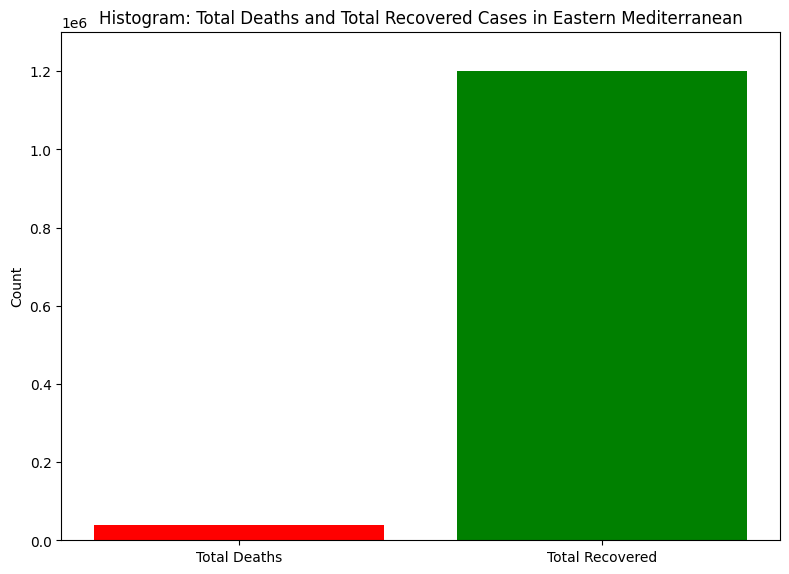

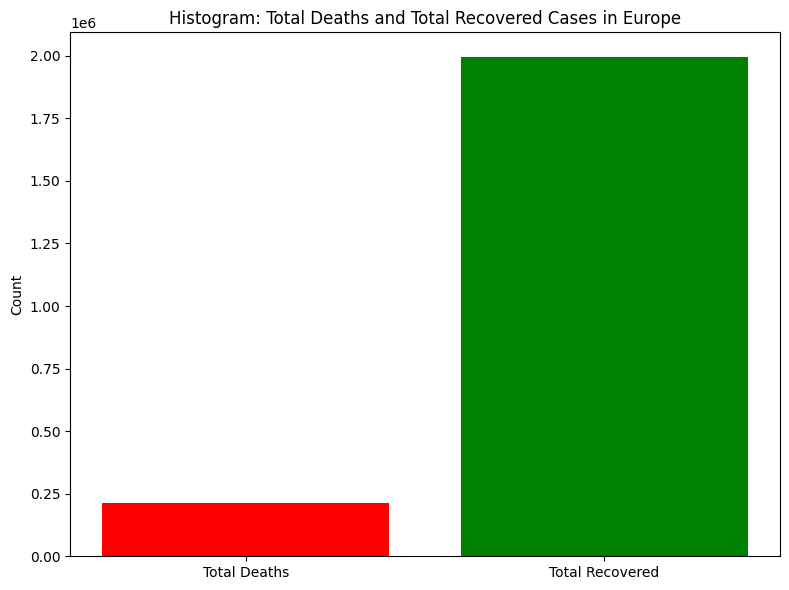

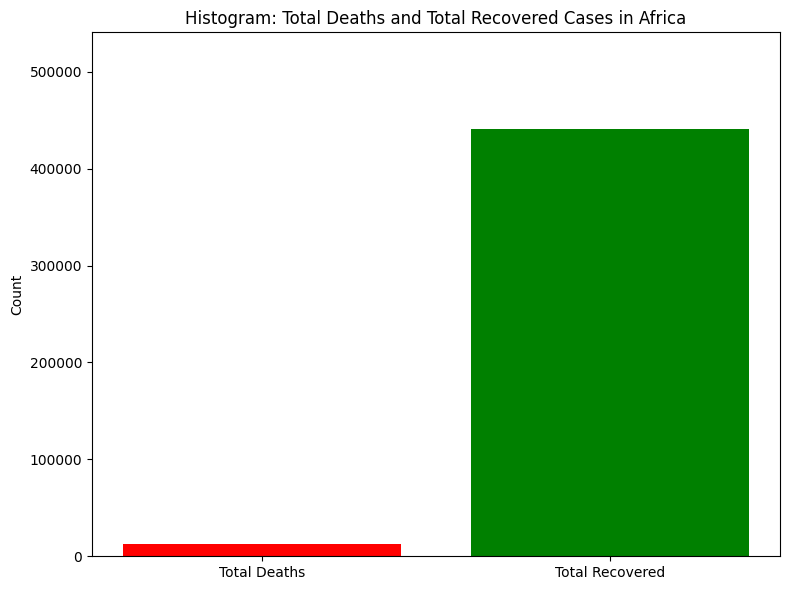

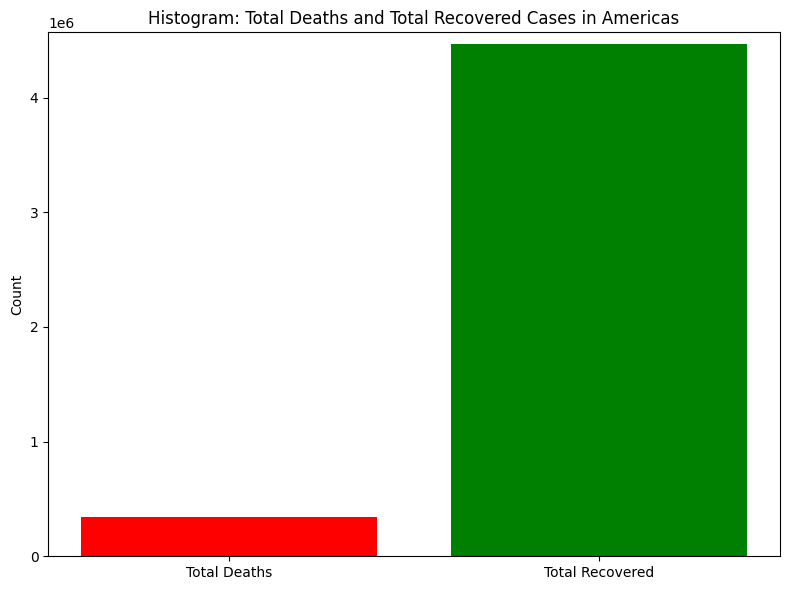

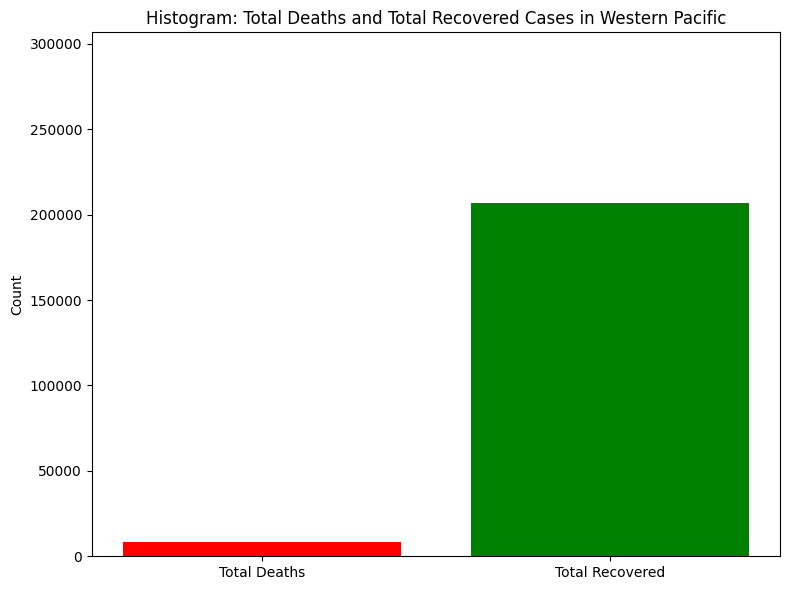

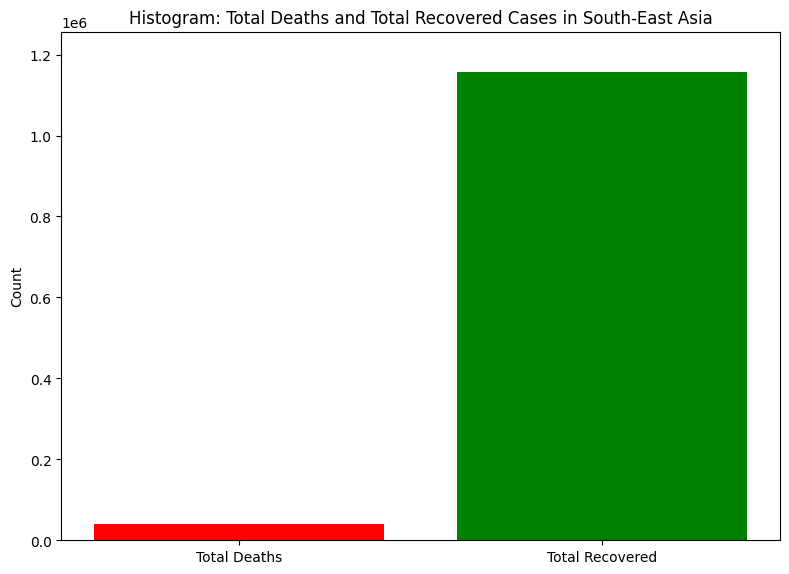

In [71]:
# import matplotlib.pyplot as plt

# def store_region_data_as_list(cw):
#     region_data_list = []  
#     region_totals = {}  

#     unique_regions = cw['WHO Region'].unique()

#     total_deaths_list = []
#     total_recovered_list = []

#     for region in unique_regions:
#         region_data = cw[cw['WHO Region'] == region]
        
#         total_deaths = region_data['Deaths'].sum()
#         total_recovered = region_data['Recovered'].sum()
    
#         region_data_list.append((region, region_data, total_deaths, total_recovered))
#         region_totals[region] = {'Deaths': total_deaths, 'Recovered': total_recovered}


#         plt.figure(figsize=(8, 6))
#         plt.bar(['Total Deaths', 'Total Recovered'], [total_deaths, total_recovered], color=['red', 'green'])
#         plt.title(f'Histogram: Total Deaths and Total Recovered Cases in {region}')
#         plt.ylabel('Count')
#         plt.ylim(0, max(total_deaths, total_recovered) + 100000)  
#         plt.tight_layout()
#         plt.show()

#         total_deaths_list.append(total_deaths)
#         total_recovered_list.append(total_recovered)

#     return region_data_list, region_totals, total_deaths_list, total_recovered_list

# region_data_storage_list, region_totals, total_deaths_list, total_recovered_list = store_region_data_as_list(cw)




<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Raphael Jay Escosia\AppData\Local\Temp\ipykernel_9592\4213762625.py:26: SyntaxWarning: invalid escape sequence '\c'
  cw = pd.read_csv('archive\country_wise_latest.csv')


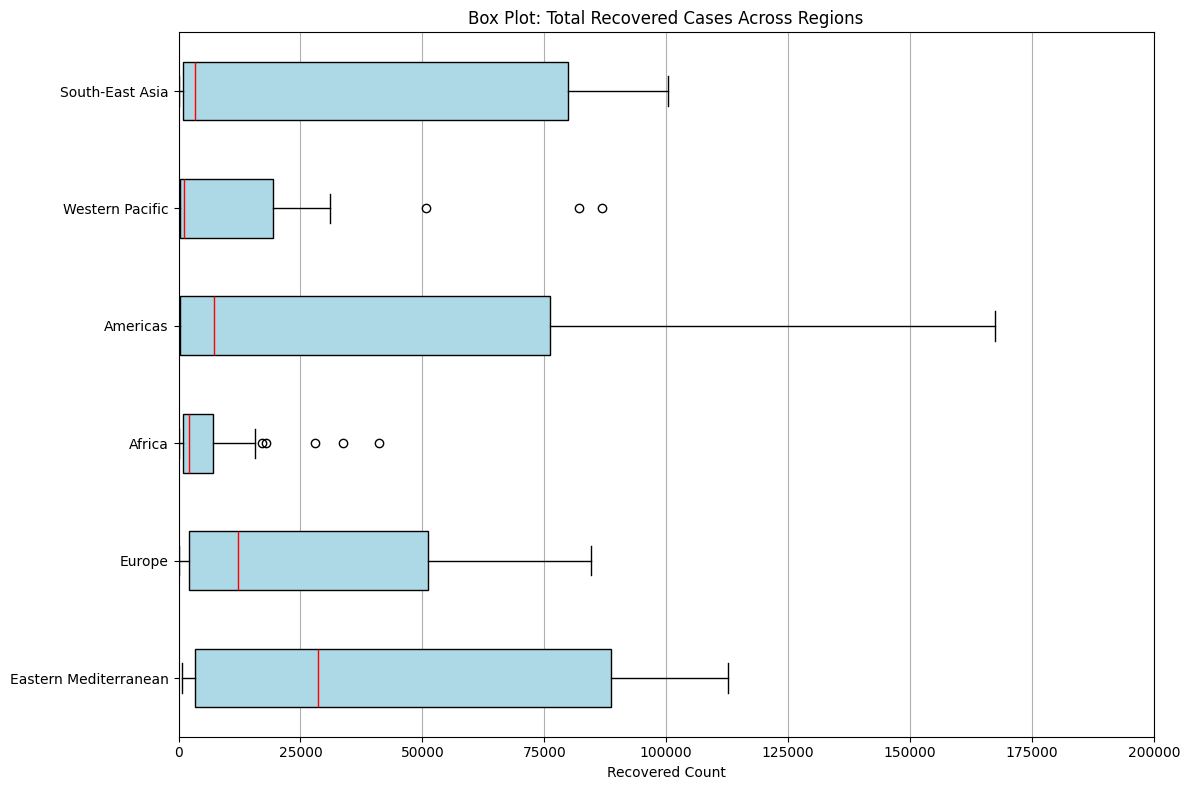

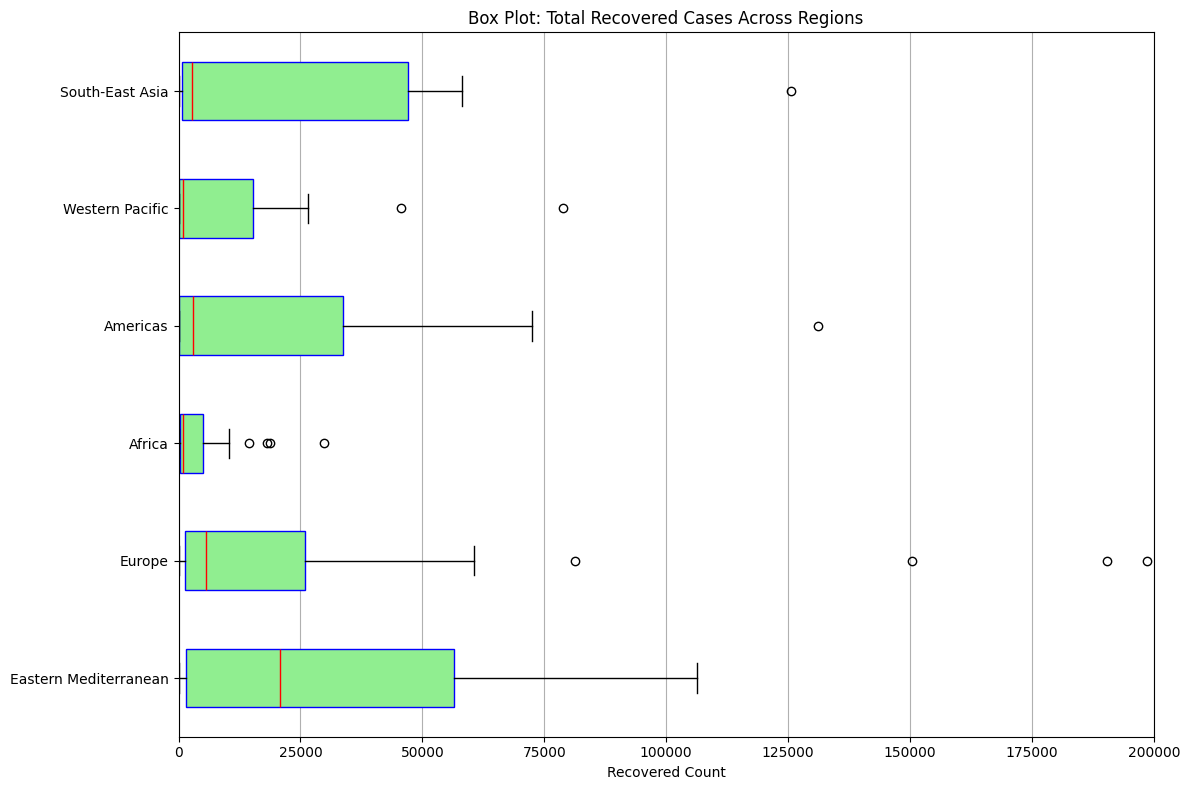

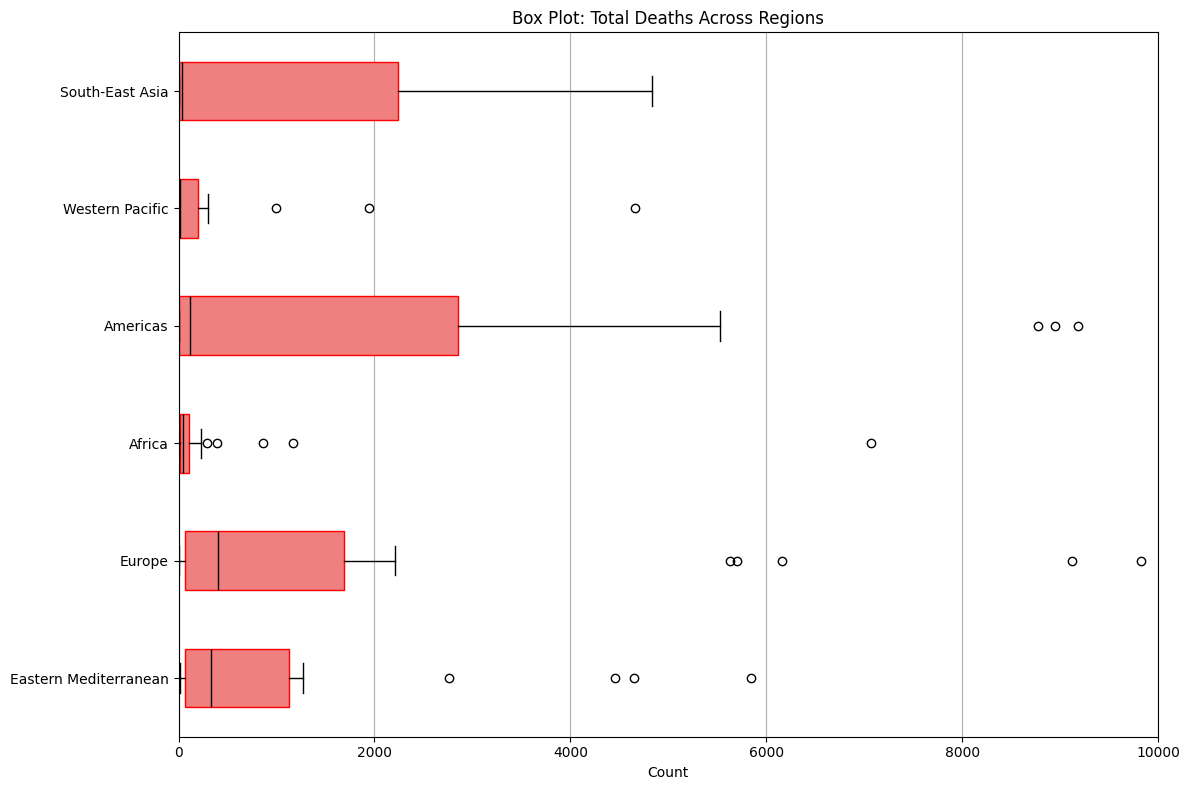

In [7]:
# def store_region_data_as_list(cw):
#     region_data_list = []  
#     region_totals = {}  

#     unique_regions = cw['WHO Region'].unique()
    
#     total_deaths_list = []
#     total_recovered_list = []

#     for region in unique_regions:
#         region_data = cw[cw['WHO Region'] == region]
        
#         total_deaths = region_data['Deaths'].sum()
#         total_recovered = region_data['Recovered'].sum()
    
#         region_data_list.append((region, region_data, total_deaths, total_recovered))
#         region_totals[region] = {'Deaths': total_deaths, 'Recovered': total_recovered}

        
#         total_deaths_list.append(total_deaths)
#         total_recovered_list.append(total_recovered)

#     return region_data_list, region_totals, total_deaths_list, total_recovered_list


cw = pd.read_csv('archive\country_wise_latest.csv')

# region_data_storage_list, region_totals, total_deaths_list, total_recovered_list = store_region_data_as_list(cw)

data_for_confirmed = [cw[cw['WHO Region'] == region]['Confirmed'].values for region in cw['WHO Region'].unique()]
data_for_recovered = [cw[cw['WHO Region'] == region]['Recovered'].values for region in cw['WHO Region'].unique()]
data_for_deaths = [cw[cw['WHO Region'] == region]['Deaths'].values for region in cw['WHO Region'].unique()]

unique_who_regions = cw['WHO Region'].unique()

plt.figure(figsize=(12, 8))
plt.boxplot(data_for_confirmed, 
            tick_labels=unique_who_regions, 
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'), 
            medianprops=dict(color='red'),
            vert=False)  

plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0, 200000) # range for bloxplot for clearer view (comment if neccessary)
 
plt.title('Box Plot: Total Recovered Cases Across Regions')
plt.xlabel('Recovered Count')  
plt.grid(axis='x') 
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.boxplot(data_for_recovered, 
            tick_labels=unique_who_regions, 
            patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='blue'), 
            medianprops=dict(color='red'),
            vert=False)  

plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0, 200000) # range for bloxplot for clearer view (comment if neccessary)
 
plt.title('Box Plot: Total Recovered Cases Across Regions')
plt.xlabel('Recovered Count')  
plt.grid(axis='x') 
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.boxplot(data_for_deaths, 
            tick_labels=unique_who_regions, 
            patch_artist=True,
            boxprops=dict(facecolor='lightcoral', color='red'), 
            medianprops=dict(color='black'),
            vert=False)  

plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0, 10000) # range for bloxplot for clearer view (comment if neccessary)
            
plt.title('Box Plot: Total Deaths Across Regions')
plt.xlabel('Count')  
plt.grid(axis='x')  
plt.tight_layout()
plt.show()

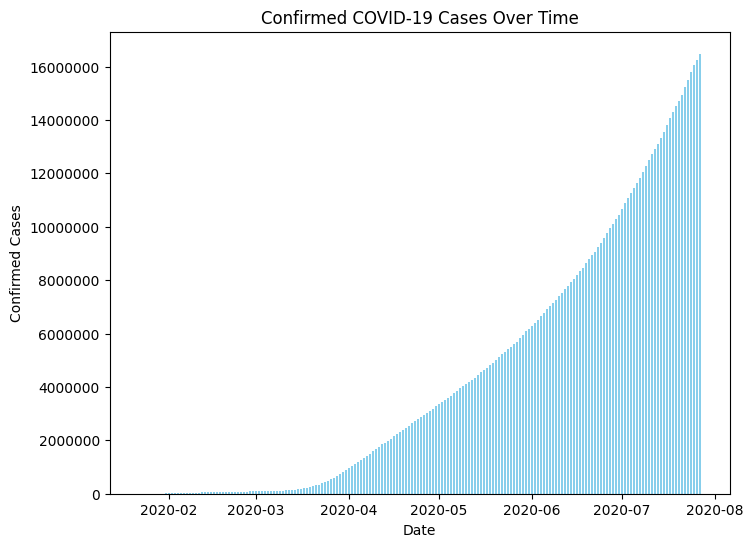

In [8]:
# Load data
df = pd.read_csv("archive/day_wise.csv")

# Convert the 'dates' column to datetime format
df['dates'] = pd.to_datetime(df['dates'], format='%m/%d/%Y')

# Plot
plt.figure(figsize=(8, 6))
plt.ticklabel_format(style='plain', axis='y')
plt.bar(df['dates'], df['Confirmed'], color='skyblue')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed COVID-19 Cases Over Time')

# plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

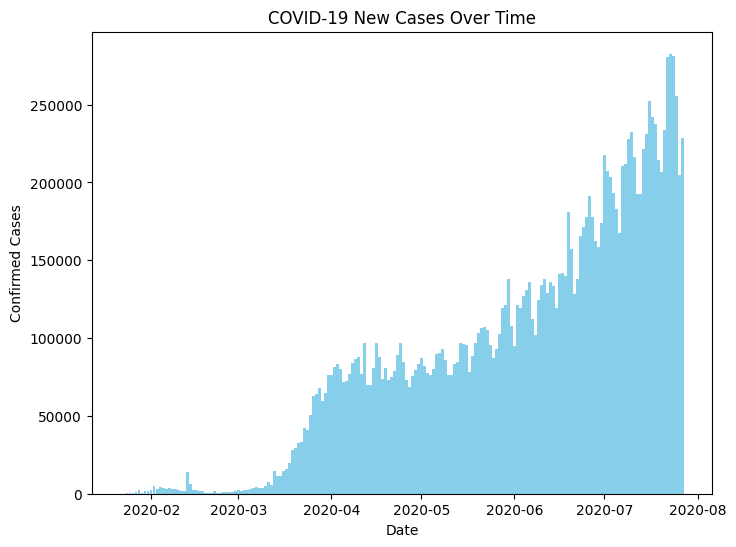

In [70]:
# Load data
df = pd.read_csv("archive/day_wise.csv")

# Convert the 'dates' column to datetime format
df['dates'] = pd.to_datetime(df['dates'], format='%m/%d/%Y')

# Plot
plt.figure(figsize=(8, 6))
plt.ticklabel_format(style='plain', axis='y')
plt.bar(df['dates'], df['New cases'], color='skyblue')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 New Cases Over Time')

# plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Raphael Jay Escosia\AppData\Local\Temp\ipykernel_9592\734715776.py:6: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('archive\covid_19_clean_complete.csv')


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


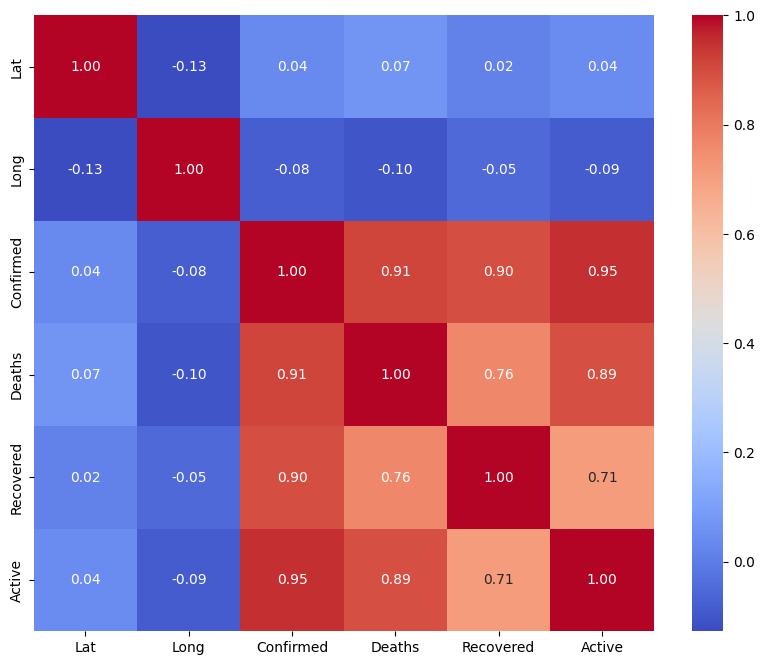

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file (assuming the file is in the same directory as your script)
df = pd.read_csv('archive\covid_19_clean_complete.csv')

# Display the first few rows of your dataset to check if it loaded correctly
print(df.head())

# Step 1: Exclude the categorical column ('WHO Region') if it's present
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Step 3: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()
